# __BAX-452 Assignment 5: PCA / Decision Tree / K Means Clustering Analysis__  

#### 001 - Yumi Jin   

### __1. Data Exploration and Visualization (20):__  

- Explore Event_entry(in Files) dataset.  
- Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.  
- Include any other plots you find interesting and provide brief interpretations.  

In [343]:
# load the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [331]:
# read in the data
entry = pd.read_csv('/Users/yumi/ucdavis/Winter Quarter/BAX-452/Assignments/HW5/Event_entry.csv')

#### __1.1 Explore the dataset and handle missing values__

In [312]:
# display the first 5 observations
entry.head(5)

,Entry,TicketClass,Sex,Age,Price,Order,Name,Ticket Number,Bank Balance
0,0,3,male,22.0,7,1,"Braund, Mr. Owen Harris",648155,74389
1,1,1,female,38.0,71,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",119239,94932
2,1,3,female,26.0,8,3,"Heikkinen, Miss. Laina",411408,26146
3,1,1,female,35.0,53,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",530093,35627
4,0,3,male,35.0,8,5,"Allen, Mr. William Henry",510583,60457


In [313]:
# display basic summary
entry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entry          869 non-null    int64  
 1   TicketClass    869 non-null    int64  
 2   Sex            869 non-null    object 
 3   Age            694 non-null    float64
 4   Price          869 non-null    int64  
 5   Order          869 non-null    int64  
 6   Name           869 non-null    object 
 7   Ticket Number  869 non-null    int64  
 8   Bank Balance   869 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 61.2+ KB


In [314]:
# display data summary
entry.describe()

,Entry,TicketClass,Age,Price,Order,Ticket Number,Bank Balance
count,869.000000,869.000000,694.000000,869.000000,869.000000,869.000000,869.000000
mean,0.384350,2.307250,29.732233,32.594937,435.000000,479171.174914,50269.125432
std,0.486721,0.836222,14.599438,50.186076,251.002988,286307.965548,28158.833520
min,0.000000,1.000000,0.420000,0.000000,1.000000,1222.000000,108.000000
25%,0.000000,2.000000,20.125000,8.000000,218.000000,228933.000000,27438.000000
50%,0.000000,3.000000,28.000000,14.000000,435.000000,453195.000000,50588.000000
75%,1.000000,3.000000,38.000000,31.000000,652.000000,722522.000000,73549.000000
max,1.000000,3.000000,80.000000,512.000000,869.000000,999921.000000,99548.000000


In [315]:
# check for any null values
entry.isnull().sum()

Entry              0
TicketClass        0
Sex                0
Age              175
Price              0
Order              0
Name               0
Ticket Number      0
Bank Balance       0
dtype: int64

There are 175 missing values in Age. To deciding whether to use the mean or median for imputation, I first analyze the distribution of the Age column.

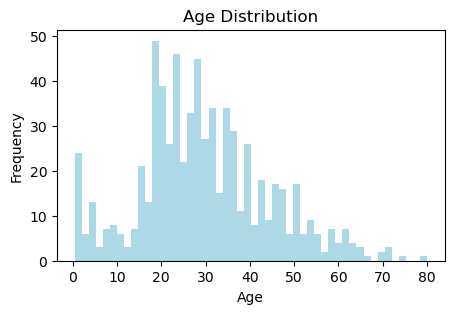

In [316]:
# plot the distribution of the 'Age' column
plt.figure(figsize = (5, 3))
entry['Age'].hist(bins = 50, color = 'lightblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

The histogram of the Age distribution is somewhat right-skewed. Given this skewness, imputing missing Age values with the median might be more appropriate than using the mean, as the median is less affected by outliers and the distribution's skew.

In [332]:
# impute missing values in Age with the median
median_age = entry['Age'].median()
entry['Age'].fillna(median_age, inplace=True)

# verify that there are no longer any missing values
entry.isnull().sum()

Entry            0
TicketClass      0
Sex              0
Age              0
Price            0
Order            0
Name             0
Ticket Number    0
Bank Balance     0
dtype: int64

#### __1.2  Create visualizations to understand the distribution of different features__

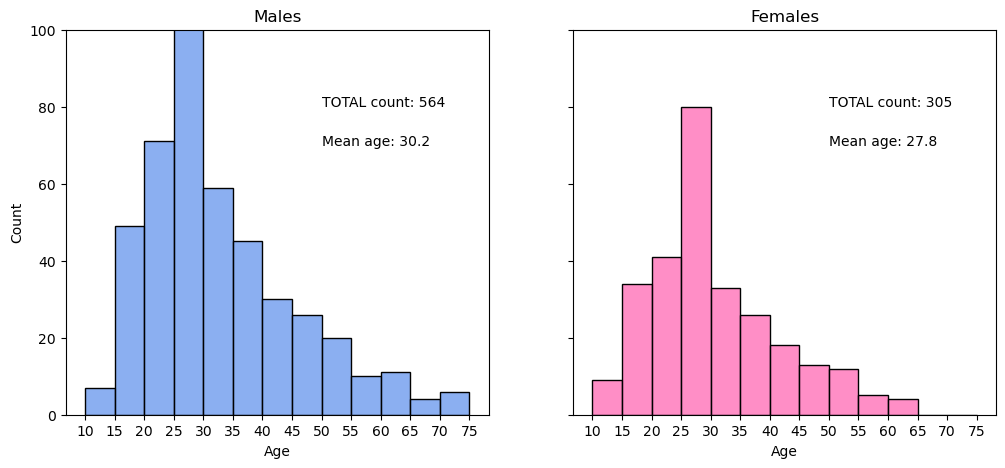

In [318]:
males_age = entry[entry['Sex'] == 'male']['Age'] # subset with males age
females_age = entry[entry['Sex'] == 'female']['Age'] # subset with females age

age_bins = range(10,80,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5), sharey = True)
sns.histplot(males_age, bins = age_bins, kde = False, color = 'cornflowerblue', ax = ax1)
ax1.set_xticks(age_bins)
ax1.set_ylim(top = 100)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,80, "TOTAL count: {}".format(males_age.count()))
ax1.text(50,70, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.histplot(females_age, bins = age_bins, kde = False, color = 'hotpink', ax = ax2)
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,80, "TOTAL count: {}".format(females_age.count()))
ax2.text(50,70, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

__Insights:__ The number of Male customer is more than the number of Female customer. The distribution of age is somewhat right-skewed in both gender, with a higher frequency of younger individuals. 

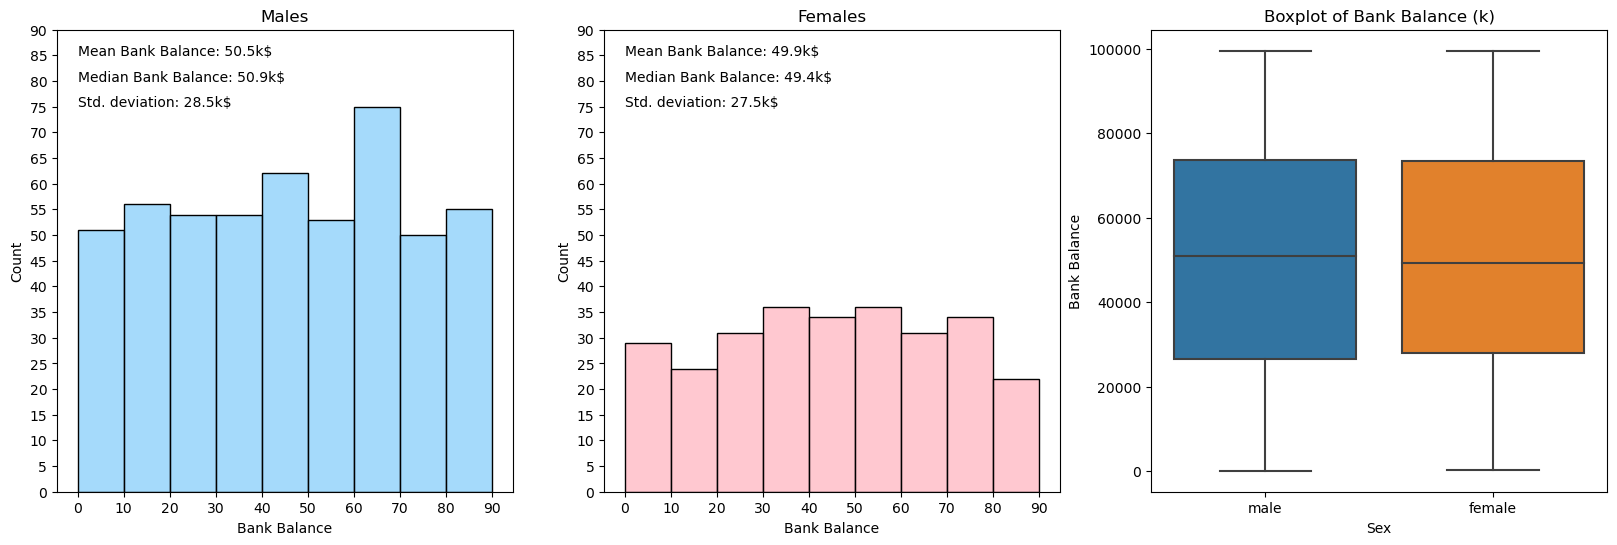

In [319]:
males_bankbalance = entry[entry['Sex'] == 'male']['Bank Balance']/1000
females_bankbalance = entry[entry['Sex'] == 'female']['Bank Balance']/1000

my_bins = range(0,100,10)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,6))
sns.histplot(males_bankbalance, bins = my_bins, kde = False, color = 'lightskyblue', ax = ax1)
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,95,5))
ax1.set_ylim(0,90)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(0,85, "Mean Bank Balance: {:.1f}k$".format(males_bankbalance.mean()))
ax1.text(0,80, "Median Bank Balance: {:.1f}k$".format(males_bankbalance.median()))
ax1.text(0,75, "Std. deviation: {:.1f}k$".format(males_bankbalance.std()))

# females histogram
sns.histplot(females_bankbalance, bins = my_bins, kde = False, color = 'lightpink', ax = ax2)
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,95,5))
ax2.set_ylim(0,90)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(0,85, "Mean Bank Balance: {:.1f}k$".format(females_bankbalance.mean()))
ax2.text(0,80, "Median Bank Balance: {:.1f}k$".format(females_bankbalance.median()))
ax2.text(0,75, "Std. deviation: {:.1f}k$".format(females_bankbalance.std()))

# boxplot
sns.boxplot(x = 'Sex', y = 'Bank Balance', data = entry, ax = ax3)
ax3.set_title('Boxplot of Bank Balance (k)')
plt.show()

__Insights:__ There is no big difference exists in Bank Balance in Genders. Male and Female have similar buying power.

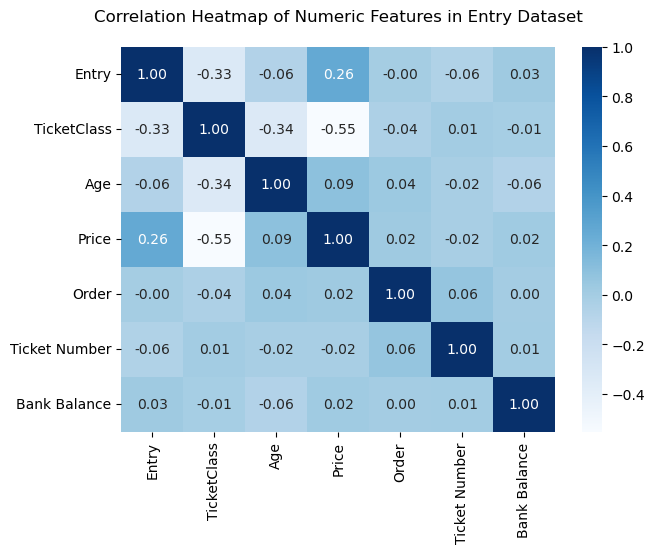

In [320]:
# select only numeric columns for the correlation matrix
numeric_data = entry.select_dtypes(include = [float, int])

# calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# create a heatmap to visualize the correlations
plt.figure(figsize = (7,5))
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f', cmap = 'Blues')
plt.title('Correlation Heatmap of Numeric Features in Entry Dataset\n')
plt.show()

__Insights:__ Price and TicketClass are negatively related while other variables almost having no relationships.

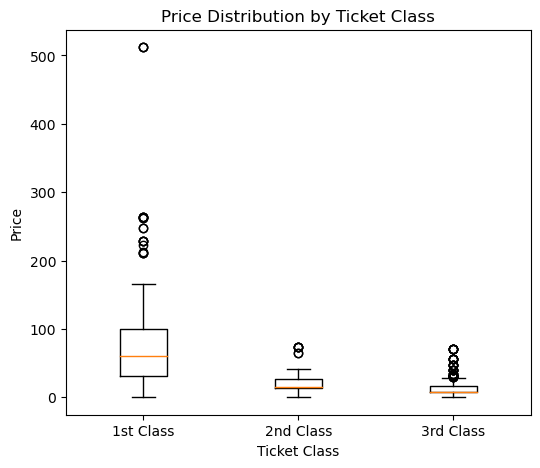

In [321]:
# box plot for 'Price' by 'TicketClass'
plt.figure(figsize = (6, 5))
plt.boxplot([entry[entry['TicketClass'] == 1]['Price'],
             entry[entry['TicketClass'] == 2]['Price'],
             entry[entry['TicketClass'] == 3]['Price']],
             labels = ['1st Class', '2nd Class', '3rd Class'])
plt.title('Price Distribution by Ticket Class')
plt.ylabel('Price')
plt.xlabel('Ticket Class')
plt.show()

__Insights:__ 1st Class Tickets having the highest median price, along with a wider range of prices, indicating a premium pricing strategy for the top tier. The presence of outliers suggests that there were some exceptionally high-priced tickets within this class. 2nd Class Tickets showing a lower median price compared to 1st class, with a narrower price range. 3rd Class Tickets exhibiting the lowest median price with the narrowest range, indicating the most affordable pricing tier for attendees. 

---

### __2. PCA Analysis (25)__ 
- Split the dataset into training and testing sets and encode the variables if needed.  
- Develop a Logistic regression model to predict If the entry to the event will be granted on not. (Use at least 6 dimensions)  
- Use PCA to reduce dimensions, try with 2, 4, and 6 dimensions  
- Use the above 2,4,6 dimensions to train and test the Logistic Regression Model and evaluate the impact it has on the performance.  
- Compare the OOS performance with that of a LASSO Logistic Regression Model.  


#### __2.1 Data Preprocessing__

Here are what I have done:  
Drop useless columns that don't help predict the Entry result, such as Name and Ticket Number.  
Encode catrgorical variables such as Ticket Class and Sex.    
Split the dataset to 20% test and 80% train.  

In [322]:
entry.dtypes

Entry              int64
TicketClass        int64
Sex               object
Age              float64
Price              int64
Order              int64
Name              object
Ticket Number      int64
Bank Balance       int64
dtype: object

In [333]:
# convert categorical data to dummy variables
entry = pd.get_dummies(entry, columns = ['Sex','TicketClass'], dtype = int)

In [324]:
entry.dtypes

Entry              int64
Age              float64
Price              int64
Order              int64
Name              object
Ticket Number      int64
Bank Balance       int64
Sex_female         int64
Sex_male           int64
TicketClass_1      int64
TicketClass_2      int64
TicketClass_3      int64
dtype: object

In [337]:
# seperate features and target variable
X = entry.drop(['Entry','Name','Ticket Number'], axis = 1)
y = entry['Entry']

# split test 20% and train 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

#### __2.2 Logistic Regression Model__

Since we are using the logistic regression model, we use accuracy to evaluate the model's performance.   
(I also included R^2 and MSE as required)

In [344]:
# initialize the logistic regression model
logit_model = LogisticRegression(max_iter = 1000, random_state = 20)

# fit the model to the training data
logit_model.fit(X_train, y_train)

# predict on the testing set
y_pred = logit_model.predict(X_test)

# calculate accuracy, mse, R^2
logit_accuracy = accuracy_score(y_test, y_pred)
logit_mse = mean_squared_error(y_test, y_pred)
logiy_r2 = r2_score(y_test, y_pred)

print("OOS Accuracy: ", logit_accuracy)
print("OOS MSE: ", logit_mse)
print("OOS R^2: ", logiy_r2)

OOS Accuracy:  0.6551724137931034
OOS MSE:  0.3448275862068966
OOS R^2:  -0.4409937888198763


#### __2.3 Perform PCA__

PCA model with 2 dimensions

In [346]:
# reduce the data to 2 dimensions
pca_2d = PCA(n_components = 2, random_state = 42)
X_train_2d = pca_2d.fit_transform(X_train)
X_test_2d = pca_2d.transform(X_test)

# initialize the logistic regression model
logit_model_2d = LogisticRegression(max_iter = 1000, random_state = 42)

# fit the model to the training data
logit_model_2d.fit(X_train_2d, y_train)

# predict on the testing set
y_pred_2d = logit_model_2d.predict(X_test_2d)

# calculate accuracy, mse, R^2
logit_accuracy_2d = accuracy_score(y_test, y_pred_2d)
logit_mse_2d = mean_squared_error(y_test, y_pred_2d)
logiy_r2_2d = r2_score(y_test, y_pred_2d)

print("OOS Accuracy: ", logit_accuracy_2d)
print("OOS MSE: ", logit_mse_2d)
print("OOS R^2: ", logiy_r2_2d)

OOS Accuracy:  0.603448275862069
OOS MSE:  0.39655172413793105
OOS R^2:  -0.6571428571428577


PCA model with 4 dimensions

In [347]:
# reduce the data to 4 dimensions
pca_4d = PCA(n_components = 4, random_state = 42)
X_train_4d = pca_4d.fit_transform(X_train)
X_test_4d = pca_4d.transform(X_test)

# initialize the logistic regression model
logit_model_4d = LogisticRegression(max_iter = 1000, random_state = 22)

# fit the model to the training data
logit_model_4d.fit(X_train_4d, y_train)

# predict on the testing set
y_pred_4d = logit_model_4d.predict(X_test_4d)

# calculate accuracy, mse, R^2
logit_accuracy_4d = accuracy_score(y_test, y_pred_4d)
logit_mse_4d = mean_squared_error(y_test, y_pred_4d)
logiy_r2_4d = r2_score(y_test, y_pred_4d)

print("OOS Accuracy: ", logit_accuracy_4d)
print("OOS MSE: ", logit_mse_4d)
print("OOS R^2: ", logiy_r2_4d)

OOS Accuracy:  0.6206896551724138
OOS MSE:  0.3793103448275862
OOS R^2:  -0.5850931677018638


PCA model with 6 dimensions

In [348]:
# reduce the data to 6 dimensions
pca_6d = PCA(n_components = 6, random_state = 42)
X_train_6d = pca_6d.fit_transform(X_train)
X_test_6d = pca_6d.transform(X_test)

# initialize the logistic regression model
logit_model_6d = LogisticRegression(max_iter = 1000, random_state = 22)

# fit the model to the training data
logit_model_6d.fit(X_train_6d, y_train)

# predict on the testing set
y_pred_6d = logit_model_6d.predict(X_test_6d)

# calculate accuracy, mse, R^2
logit_accuracy_6d = accuracy_score(y_test, y_pred_6d)
logit_mse_6d = mean_squared_error(y_test, y_pred_6d)
logiy_r2_6d = r2_score(y_test, y_pred_6d)

print("OOS Accuracy: ", logit_accuracy_6d)
print("OOS MSE: ", logit_mse_6d)
print("OOS R^2: ", logiy_r2_6d)

OOS Accuracy:  0.735632183908046
OOS MSE:  0.26436781609195403
OOS R^2:  -0.10476190476190506


__Interpretation:__   

2 Dimensions: Approximately 60.3% accuracy    
4 Dimensions: Approximately 62.1% accuracy  
6 Dimensions: Approximately 73.6% accuracy    

Reducing the variables to 6 dimensions using PCA improved the model's accuracy to approximately 73.6%, which is higher than the initial model's accuracy of 65.5%, suggesting that PCA helped in enhancing the model's performance.  

As dimensions decreasing, R^2 decreased from -0.10 to -0.59 to -0.66. And the original R^2 is -0.44, thie result also concide with the conclusion of accuracy.



#### __2.4 LASSO Logistic Regression Model__

In [349]:
# initialize the LASSO Logistic Regression model (L1 penalty)
logit_model_lasso = LogisticRegressionCV(cv = 5, 
                                         penalty = 'l1', 
                                         solver = 'liblinear', 
                                         max_iter = 1000, 
                                         random_state = 42)

# fit the model to the training data
logit_model_lasso.fit(X_train, y_train)

# predict on the testing set
y_pred_lasso = logit_model_lasso.predict(X_test)

# calculate accuracy, mse, R^2
logit_accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
logit_mse_lasso = mean_squared_error(y_test, y_pred_lasso)
logiy_r2_lasso = r2_score(y_test, y_pred_lasso)

print("OOS Accuracy: ", logit_accuracy_lasso)
print("OOS MSE: ", logit_mse_lasso)
print("OOS R^2: ", logiy_r2_lasso)

OOS Accuracy:  0.764367816091954
OOS MSE:  0.23563218390804597
OOS R^2:  0.015320910973084634


__Interpretation:__ The LASSO Logistic Regression model, utilizing L1 regularization to perform feature selection and complexity control, achieved an accuracy of approximately 76.4% on the testing set. This performance surpasses the initial Logistic Regression model's accuracy (65.5%) and the PCA-reduced models with 2 (60.3%) and 4 (62.1%) dimensions. It is also slightly better than the PCA model with 6 dimensions (73.6%). R^2 and MSE also concide with it.

__Summary:__ While PCA can lighten computation and might be preferred for very high-dimensional data, LASSO Logistic Regression provided the best balance between model simplicity and performance in this case.

---

### __3. Decision Tree Analysis (25):__ 
- Split the dataset into training and testing sets and encode the variables if needed.
Preprocess the data as necessary (handling missing values, encoding categorical variables, removing unnecessary columns etc.)  
- Explain the steps clearly that you took in preparing the data and developing the model, feel free to remove unnecessary columns.  
- Train the decision tree classifier using the training data.  
- Predict the accuracy of model using test data and explain the results.  

#### __3.1 Data preprocessing__

In [351]:
# I have already processed the data in previous part 
# display X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            869 non-null    float64
 1   Price          869 non-null    int64  
 2   Order          869 non-null    int64  
 3   Bank Balance   869 non-null    int64  
 4   Sex_female     869 non-null    int64  
 5   Sex_male       869 non-null    int64  
 6   TicketClass_1  869 non-null    int64  
 7   TicketClass_2  869 non-null    int64  
 8   TicketClass_3  869 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 61.2 KB


In [352]:
# display y
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 869 entries, 0 to 868
Series name: Entry
Non-Null Count  Dtype
--------------  -----
869 non-null    int64
dtypes: int64(1)
memory usage: 6.9 KB


In [353]:
# resplit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 16)

#### __3.2 Train the Decision Tree classifier__

In [356]:
# fit the decision tree classifier
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

#### __3.3 Predict the accuracy of model__

In [359]:
# predict on the test data
y_pred = model_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the result
print("OOS Accuracy:", accuracy)
print("OOS MSE:", mse)
print("OOS R^2:", r2)

OOS Accuracy: 0.7528735632183908
OOS MSE: 0.2471264367816092
OOS R^2: -0.05603387438249818


__Interpretation:__ The decision tree classifier have an out-of-sample accuracy score of around 75.3% which is relatively high, showing a good predictive ability. But further analysis may still be needed.

---

### __4. K Means Clustering(30)__
- Use the Entry_event database and use the Age and Price columns only (drop all other columns)  
- Perform K means clustering for different values of K.  
- Draw a plot and figure out the appropriate value of K, explain in detail the reason for picking K value and the implications.  
- Create the clusters using the above value of K.  
- Plot a graph to show the different clusters.  

#### __4.1 Perform K means clustering for different values of K__

In [371]:
# drop all other columns and use the age and price columns only
columns = ['Age','Price']
df_cluster = X[columns]
df_cluster.head()

,Age,Price
0,22.0,7
1,38.0,71
2,26.0,8
3,35.0,53
4,35.0,8


In [372]:
# scale the data
ms = MinMaxScaler()
scaled_data = ms.fit_transform(df_cluster)
scaled_df = pd.DataFrame(scaled_data, columns = df_cluster.columns)  

In [373]:
# perform k-means clustering while K = 2
kmeans = KMeans(n_clusters = 2, random_state = 2, n_init = 10)
kmeans.fit(scaled_df)
# attach the labels and show the clustering result
scaled_df['Cluster_2'] = kmeans.labels_
scaled_df['Cluster_2'].value_counts()

Cluster_2
0    649
1    220
Name: count, dtype: int64

In [374]:
# perform k-means clustering while K = 3
kmeans = KMeans(n_clusters = 3, random_state = 3, n_init = 10)
kmeans.fit(scaled_df)
# attach the labels and show the clustering result
scaled_df['Cluster_3'] = kmeans.labels_
scaled_df['Cluster_3'].value_counts()

Cluster_3
0    479
1    220
2    170
Name: count, dtype: int64

In [375]:
# perform k-means clustering while K = 4
kmeans = KMeans(n_clusters = 4, random_state = 4, n_init = 10)
kmeans.fit(scaled_df)
# attach the labels and show the clustering result
scaled_df['Cluster_4'] = kmeans.labels_
scaled_df['Cluster_4'].value_counts()

Cluster_4
1    479
2    217
0    170
3      3
Name: count, dtype: int64

#### __4.1 Choose the appropriate value of K__

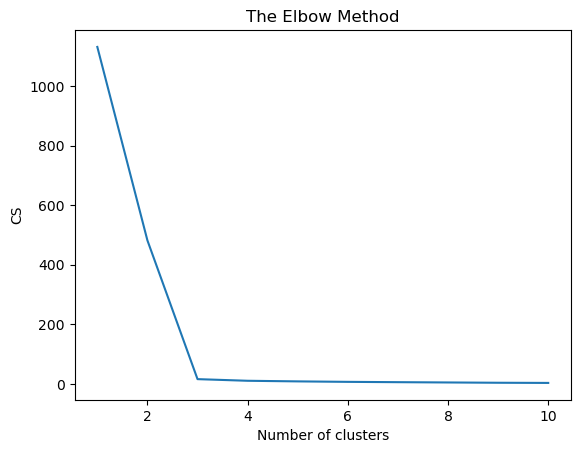

In [376]:
# choose the optimal K using the elbow method
cs = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df)
    cs.append(kmeans.inertia_)
    
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

__Interpretations:__   
The plot shows a sharp decline in CS as the number of clusters increases from 1 to 3. After that point, the decrease in CS slows down significantly, indicating that additional clusters beyond this point do not contribute much to reducing the within-cluster variability.
__Thus I would use K = 3 as my optimal k value.__

#### __4.1 Perform K means clustering using the optimal value of K and plot__

In [377]:
# perform k-means clustering while K = 3
kmeans = KMeans(n_clusters = 3, random_state = 3, n_init = 10)
kmeans.fit(scaled_df)
# attach the labels and show the clustering result
scaled_df['Cluster_3'] = kmeans.labels_
scaled_df['Cluster_3'].value_counts()

Cluster_3
0    479
2    220
1    170
Name: count, dtype: int64

In [379]:
# drop other clustering results
scaled_df = scaled_df.drop(['Cluster_2', 'Cluster_4'], axis = 1)
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        869 non-null    float64
 1   Price      869 non-null    float64
 2   Cluster_3  869 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 17.1 KB


/Users/yumi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


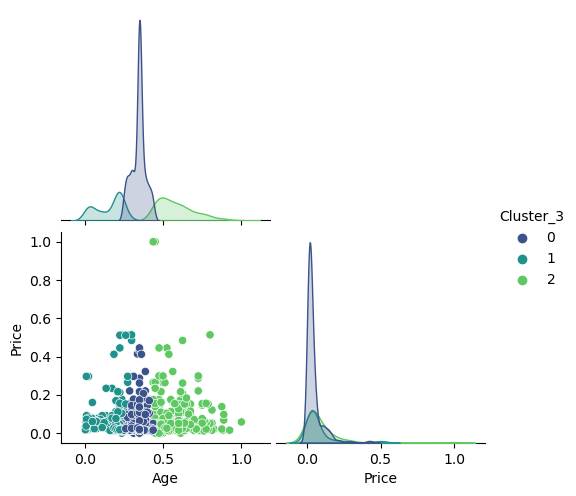

In [381]:
scaled_df['Cluster_3'] = scaled_df['Cluster_3'].astype('category')

# create the pairplot
sns.pairplot(scaled_df, hue = 'Cluster_3', palette = 'viridis', corner = True)
plt.show()

Text(0, 0.5, 'Price')

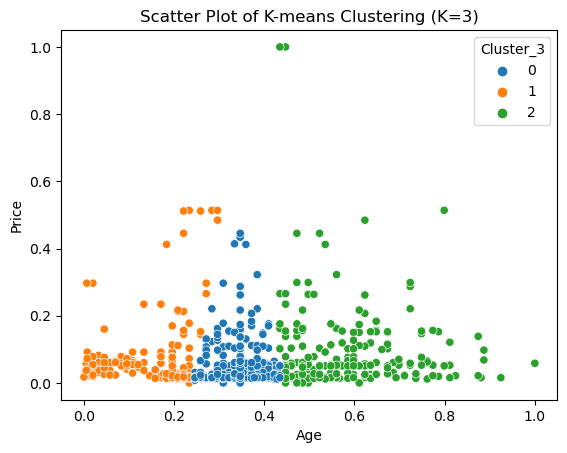

In [382]:
# draw the scatter plot
sns.scatterplot(x = scaled_df['Age'], y = scaled_df['Price'], hue = scaled_df['Cluster_3'], marker = 'o')
plt.title('Scatter Plot of K-means Clustering (K=3)')
plt.xlabel('Age')
plt.ylabel('Price')